### Monitoring polarity robustness in reduced-flow conditions (nop-1 RNAi)

Context:
- nop-1 RNAi reduces cortical flows, rendering systems more dependent on PAR-2-based feedback for polarity
- Testing polarity (as measured by 2-cell asymmetry) for PAR-2(wt) and RING mutant alleles in control conditions vs nop-1 RNAi

Results:
- Whilst PAR-2(wt) cells are able to maintain polarity in nop-1 RNAi conditions, RING mutants are unable to do so

Dependencies:
- 2-cell ASI measurements are found in _data/2cellASI.csv_

In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import pandas as pd

from src import (
    add_stats_table_row,
    bootstrap_effect_size_pd,
    dataplot,
    lighten,
    nb_setup,
)

nb_setup()
os.makedirs("Figs", exist_ok=True)
os.makedirs("../../../data/EMBO_source_data", exist_ok=True)

%matplotlib inline

In [2]:
# Import data
df = pd.read_csv("../../../data/2cellASI.csv")
df = df[df.Genotype.isin(["WT", "C56S", "L109R"])]
df_ctrl = df[df.Condition == "ctrl"]
df_nop1 = df[df.Condition == "36hrnop1"]

### Plot: 2-cell asymmetry (ctrl vs nop1)

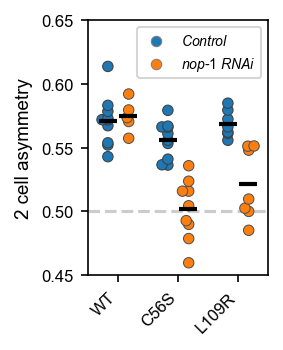

In [3]:
# Set up figure
fig, ax = plt.subplots()
fig.set_size_inches(3, 2.5)
offset = lambda p: transforms.ScaledTranslation(p / 72.0, 0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

# Colour palettes
order = ["WT", "C56S", "L109R"]
palette1 = {"WT": "tab:blue", "C56S": "tab:orange", "L109R": "tab:green"}
palette2 = {_: lighten(__, 1.7) for _, __ in palette1.items()}

# Plot ctrl data
dataplot(
    data=df_ctrl,
    x="Genotype",
    y="Two cell asymmetry",
    ax=ax,
    order=order,
    color="tab:blue",
    transform=trans + offset(-5),
    linewidth=0.5,
    offset=-0.17,
    width=0.3,
    linewidth_mean=2,
)

# Plot nop1 data
dataplot(
    data=df_nop1,
    x="Genotype",
    y="Two cell asymmetry",
    ax=ax,
    order=order,
    color="tab:orange",
    transform=trans + offset(5),
    linewidth=0.5,
    offset=0.17,
    width=0.3,
    linewidth_mean=2,
)

# Legend
dot1 = ax.scatter(x=[], y=[], linewidth=0.5, edgecolors="gray", color="tab:blue", s=25)
dot2 = ax.scatter(
    x=[], y=[], linewidth=0.5, edgecolors="gray", color="tab:orange", s=25
)
ax.legend([dot1, dot2], [r"$Control$", r"$nop$" + "-" + r"$1\ RNAi$"], fontsize=6.7)

# Finalise figure
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment("right")
ax.tick_params(axis="both", labelsize=8)
ax.set_xlabel("")
ax.set_ylim(0.45, 0.65)
ax.set_ylabel("2 cell asymmetry", fontsize=9)
ax.axhline(0.5, c="0.8", linestyle="--", zorder=0)
fig.set_size_inches(2, 2.5)
fig.subplots_adjust(left=0.3, bottom=0.2)

# Save figure
fig.savefig("Figs/2cell_nop1.png", dpi=600, transparent=True)
fig.savefig("Figs/2cell_nop1.pdf", transparent=True)

# SourceData
df.to_csv("../../../data/EMBO_source_data/2K.csv", index=False)

In [4]:
# Effect size nop1 vs ctrl for WT
es, pr, ss = bootstrap_effect_size_pd(
    data=df[df.Genotype == "WT"],
    x="Condition",
    y="Two cell asymmetry",
    a="ctrl",
    b="36hrnop1",
)
add_stats_table_row(
    figure="2",
    panel="K",
    sample_a="PAR-2(WT); control",
    sample_b="PAR-2(WT); nop-1 RNAi",
    measure="2 cell asymmetry (mean)",
    effect_size=es,
    probability_distribution=pr,
    sample_size=ss,
    key="uWOeuWhzPs",
)

# Effect size nop1 vs ctrl for C56S
es, pr, ss = bootstrap_effect_size_pd(
    data=df[df.Genotype == "C56S"],
    x="Condition",
    y="Two cell asymmetry",
    a="ctrl",
    b="36hrnop1",
)
add_stats_table_row(
    figure="2",
    panel="K",
    sample_a="PAR-2(C56S); control",
    sample_b="PAR-2(C56S); nop-1 RNAi",
    measure="2 cell asymmetry (mean)",
    effect_size=es,
    probability_distribution=pr,
    sample_size=ss,
    key="Lp9BssXFEN",
)

# Effect size nop1 vs ctrl for L109R
es, pr, ss = bootstrap_effect_size_pd(
    data=df[df.Genotype == "L109R"],
    x="Condition",
    y="Two cell asymmetry",
    a="ctrl",
    b="36hrnop1",
)
add_stats_table_row(
    figure="2",
    panel="K",
    sample_a="PAR-2(L109R); control",
    sample_b="PAR-2(L109R); nop-1 RNAi",
    measure="2 cell asymmetry (mean)",
    effect_size=es,
    probability_distribution=pr,
    sample_size=ss,
    key="fWOJtiHbrF",
)